In [8]:
def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')

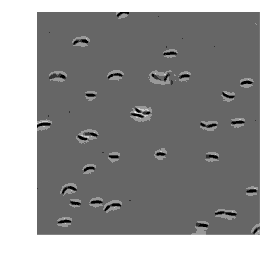

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import skimage

im = plt.imread('fig/caulobacter.png')
#print 'original image shape:', im.shape
#print 'alpha channel intensity: %.2f +- %.2f' % (np.mean(im[:,:,-1]), np.std(im[:,:,-1]))

my_imshow(im);

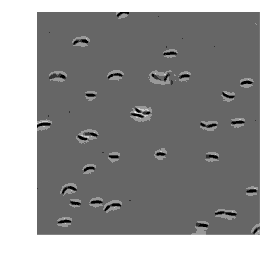

In [14]:
from skimage import color

# convert to gray 
gray_im = color.rgb2gray(im)
my_imshow(gray_im)

C:\Users\KwangChun\Anaconda2\lib\site-packages\skimage\filters\_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):


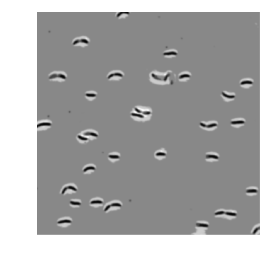

In [15]:
from skimage import filters

blurred_im = filters.gaussian_filter(gray_im, sigma=3)
my_imshow(blurred_im)

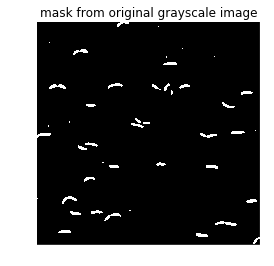

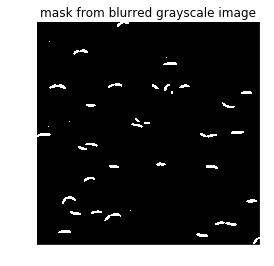

In [16]:
thresh = 0.3
mask = gray_im < thresh
blurred_mask = blurred_im < thresh

my_imshow(mask, title='mask from original grayscale image')
my_imshow(blurred_mask, title='mask from blurred grayscale image')

C:\Users\KwangChun\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


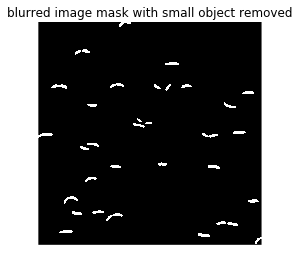

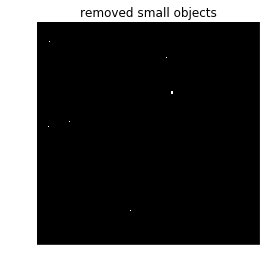

In [17]:
from skimage import morphology

blurred_mask_clean = morphology.remove_small_objects(blurred_mask, min_size=150)

my_imshow(blurred_mask_clean, title='blurred image mask with small object removed')
my_imshow(blurred_mask - blurred_mask_clean, 'removed small objects')

distance transform: (1024L, 1024L) float64


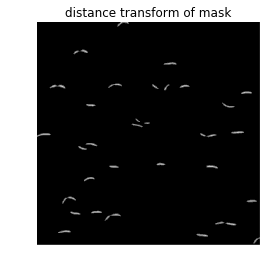

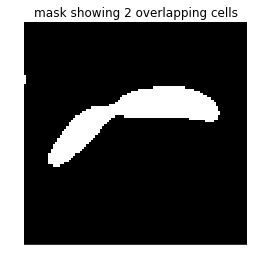

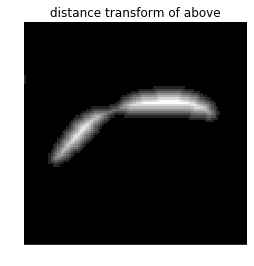

In [18]:

from scipy import ndimage as ndi

distance_im = ndi.distance_transform_edt(blurred_mask_clean)
print 'distance transform:', distance_im.shape, distance_im.dtype

my_imshow(distance_im, title='distance transform of mask')
my_imshow(blurred_mask_clean[850:950, 300:400], title='mask showing 2 overlapping cells')
my_imshow(distance_im[850:950, 300:400], title='distance transform of above')

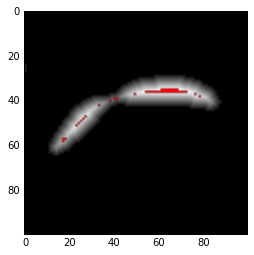

In [20]:
from skimage import feature, measure
from matplotlib.colors import ListedColormap

def imshow_overlay(im, mask, alpha=0.5, color='red', **kwargs):
    """Show semi-transparent red mask over an image"""
    mask = mask > 0
    mask = np.ma.masked_where(~mask, mask)        
    plt.imshow(im, **kwargs)
    plt.imshow(mask, alpha=alpha, cmap=ListedColormap([color]))


peaks_im = feature.peak_local_max(distance_im, indices=False)

plt.figure()
imshow_overlay(distance_im[850:950, 300:400], peaks_im[850:950, 300:400], alpha=1, cmap='gray')

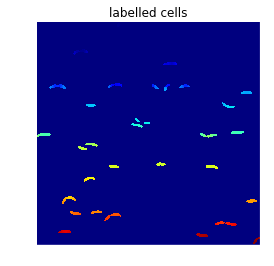

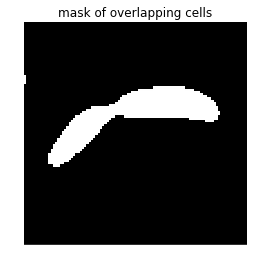

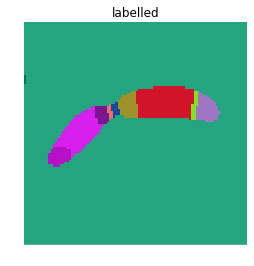

In [21]:
import matplotlib
random_colors = matplotlib.colors.ListedColormap (np.random.rand ( 256,3))


markers_im = measure.label(peaks_im)
labelled_cell_im = morphology.watershed(-distance_im, markers_im, mask=blurred_mask_clean)

my_imshow(labelled_cell_im, 'labelled cells', cmap='jet')
my_imshow(blurred_mask_clean[850:950, 300:400], 'mask of overlapping cells')
my_imshow(labelled_cell_im[850:950, 300:400], 'labelled', cmap=random_colors)